In [29]:
# for data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
from sklearn.ensemble import BaggingRegressor
import xgboost

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
from sklearn.metrics import classification_report, confusion_matrix

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('consolidated_data.csv')
print(df.columns.values)

['deviceIORate' 'cpu' 'memory' 'conns' 'arrivalRate' 'ioLoad' 'cpuLoad'
 'responseTime']


In [31]:
df.head()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
0,50,1,700,25,1,0,350,14.6
1,50,1,700,25,1,0,400,15.1
2,50,1,700,25,1,0,450,15.1
3,50,1,700,25,1,0,500,14.6
4,50,1,700,25,1,20,350,23.8


In [32]:
# preview the data
df.tail()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
12513,50,4,800,100,20,180,500,878958.3
12514,50,4,800,100,20,200,350,827122.4
12515,50,4,800,100,20,200,400,1105585.7
12516,50,4,800,100,20,200,450,539449.2
12517,50,4,800,100,20,200,500,477299.5


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceIORate,12518.0,50.000000,0.000000,50.0,50.00,50.0,50.00,50.0
cpu,12518.0,2.687170,1.488336,1.0,1.00,4.0,4.00,4.0
memory,12518.0,745.869947,49.831125,700.0,700.00,700.0,800.00,800.0
conns,12518.0,58.655536,27.023705,25.0,25.00,50.0,75.00,100.0
arrivalRate,12518.0,10.177504,5.718124,1.0,5.00,10.0,15.00,20.0
ioLoad,12518.0,99.904138,63.248007,0.0,40.00,100.0,160.00,200.0
cpuLoad,12518.0,424.992012,55.903932,350.0,362.50,400.0,450.00,500.0
responseTime,12518.0,111764.966688,217321.774190,8.5,4240.85,29469.1,93288.25,2008239.3


In [34]:
response_time_corr = df.corr()['responseTime'].sort_values(ascending=False)
print(response_time_corr)

responseTime    1.000000
conns           0.513892
ioLoad          0.422268
cpu             0.094844
arrivalRate     0.084401
cpuLoad        -0.002370
memory         -0.060463
deviceIORate         NaN
Name: responseTime, dtype: float64


In [35]:
df.drop(['deviceIORate'], axis=1, inplace=True)

In [36]:
# Features
X = df.drop('responseTime',axis=1)

# Label
y = df['responseTime']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8762, 6)
(3756, 6)
(8762,)
(3756,)


In [37]:
scaler = StandardScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test.reshape(-1,1))
y_train = scaler.fit_transform(y_train.reshape(-1,1))

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.7103968322501557
Min:  -1.5958063612771007


In [38]:
def fit_and_evaluate(model):
    model.fit(X_train,y_train)
    # predictions on the test set
    predictions = model.predict(X_test)

    print('MAE: ',mean_absolute_error(y_test,predictions))
    print('MSE: ',mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
    print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

    print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

    return predictions

In [39]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
predictions = fit_and_evaluate(svr)

MAE:  0.13010813607589755
MSE:  0.08570660312686487
RMSE:  0.2927569010747054
Variance Regression Score:  0.9143080371568507
MAPE:  0.42873600059632494


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

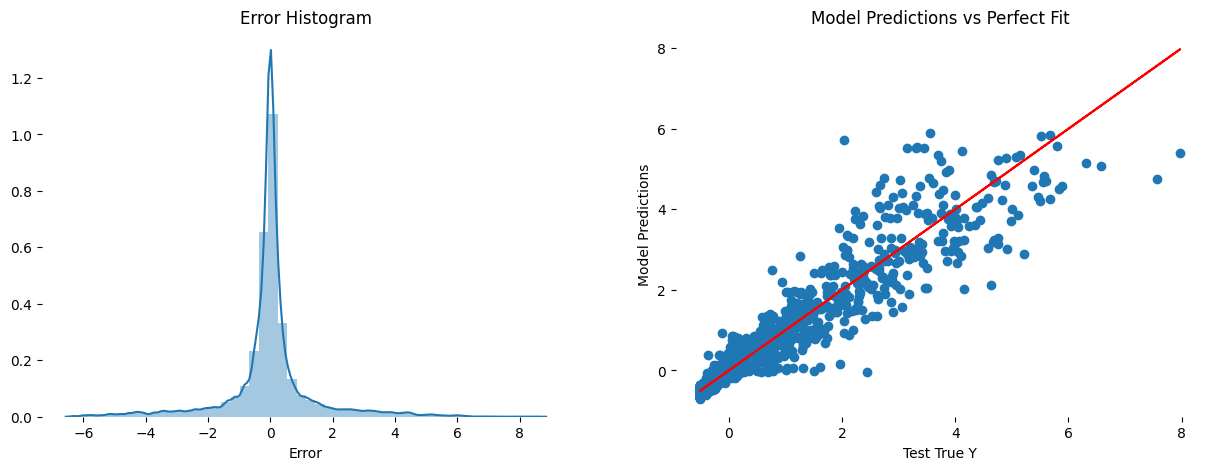

In [40]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

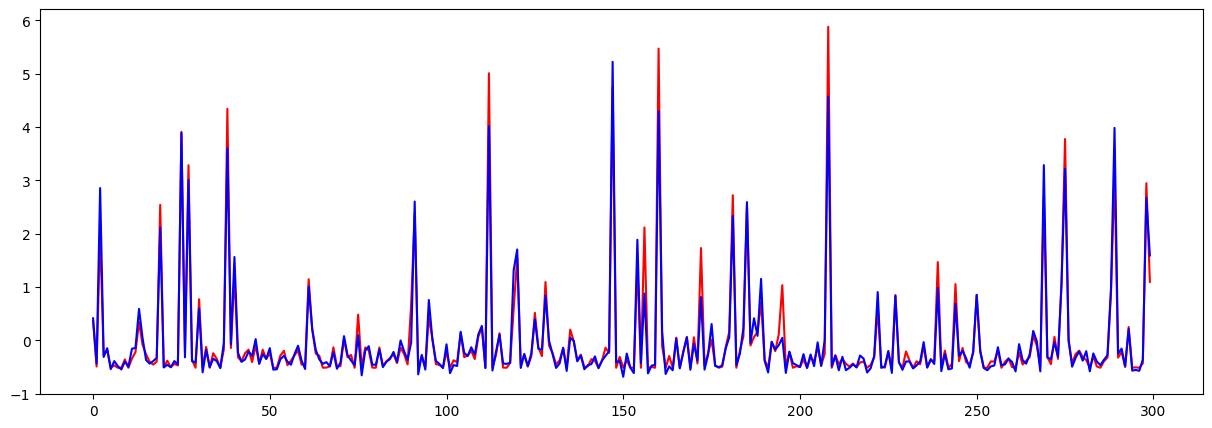

In [41]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()

In [42]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
predictions = fit_and_evaluate(random_forest)

MAE:  0.09621708400824994
MSE:  0.08198063274422929
RMSE:  0.2863226025730929
Variance Regression Score:  0.9186942099592945
MAPE:  0.2491139884506688


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

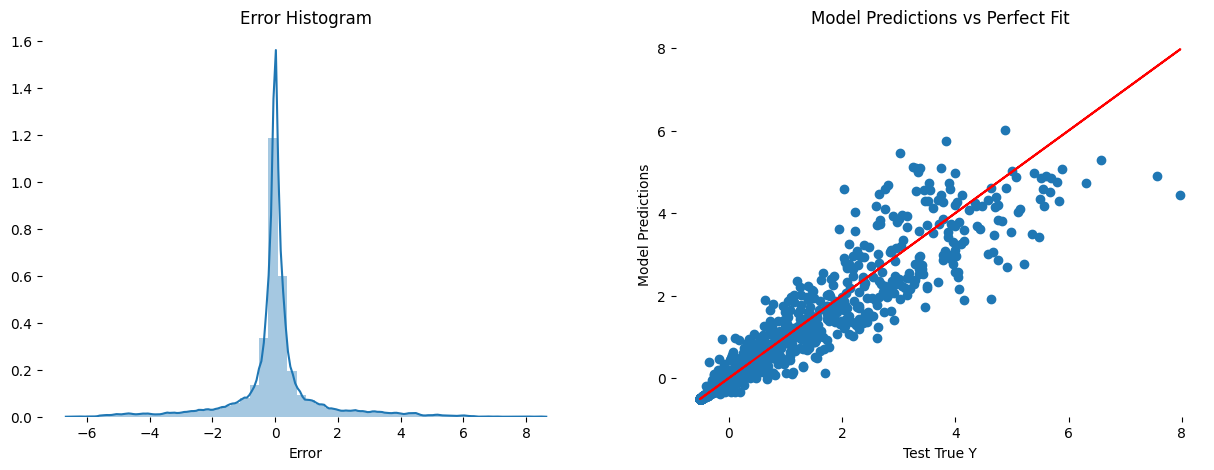

In [43]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

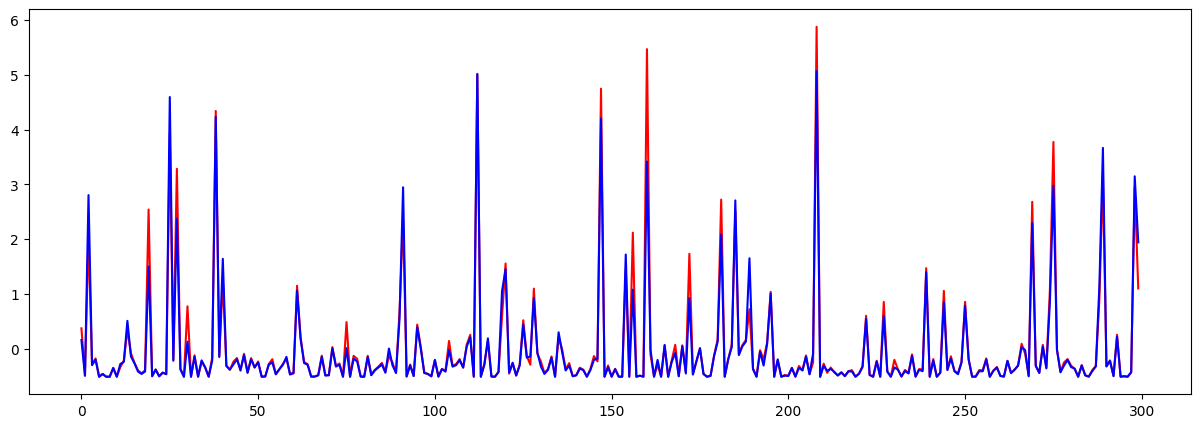

In [44]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()

In [45]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
predictions = fit_and_evaluate(gradient_boosted)

MAE:  0.15882652243275333
MSE:  0.09907878804519141
RMSE:  0.3147678319733314
Variance Regression Score:  0.9020468282080972
MAPE:  0.8359166541404928


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

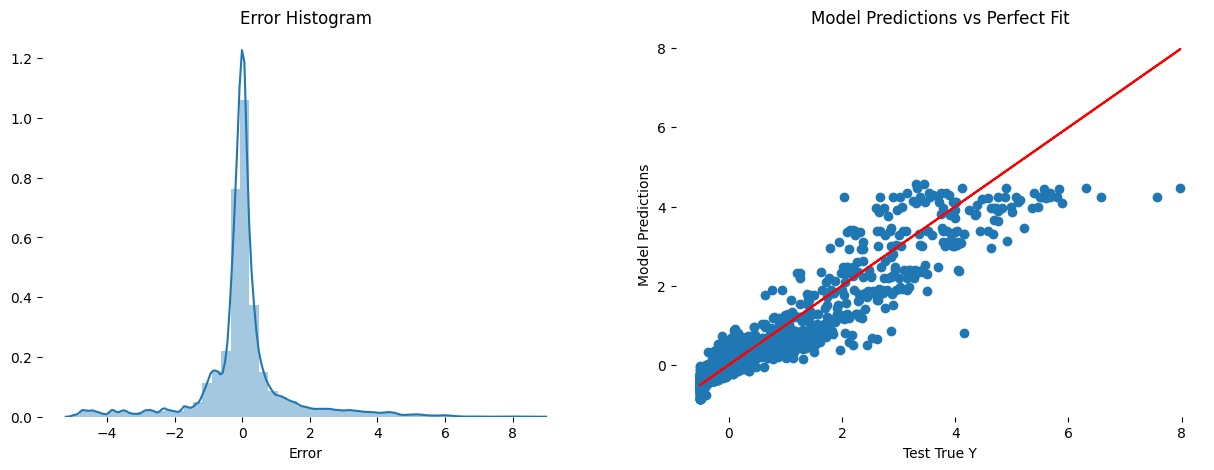

In [46]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

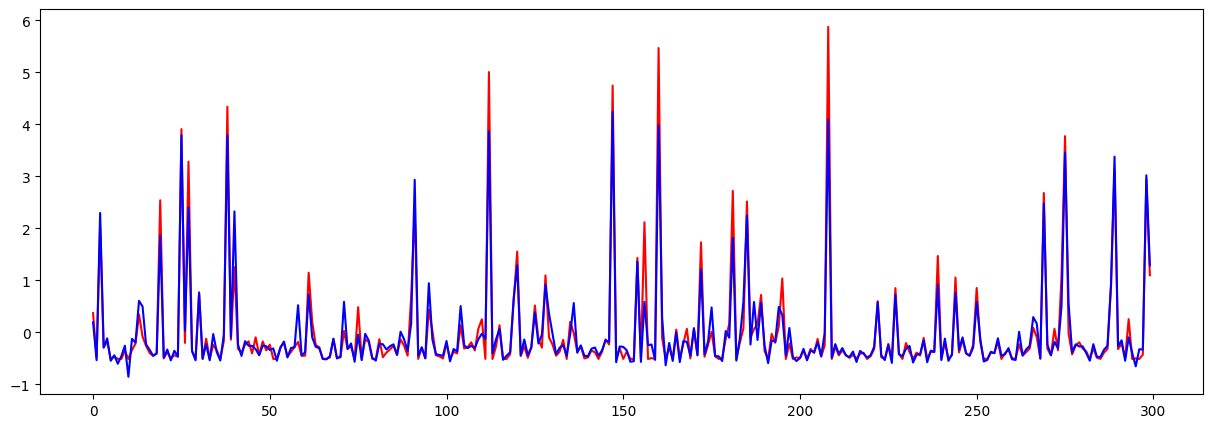

In [47]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()

In [48]:
# Bagging Regressor
bagging = BaggingRegressor()
predictions = fit_and_evaluate(bagging)

MAE:  0.09862089070780124
MSE:  0.08858477592068231
RMSE:  0.2976319470767248
Variance Regression Score:  0.9120170789869108
MAPE:  0.26885678263802887


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

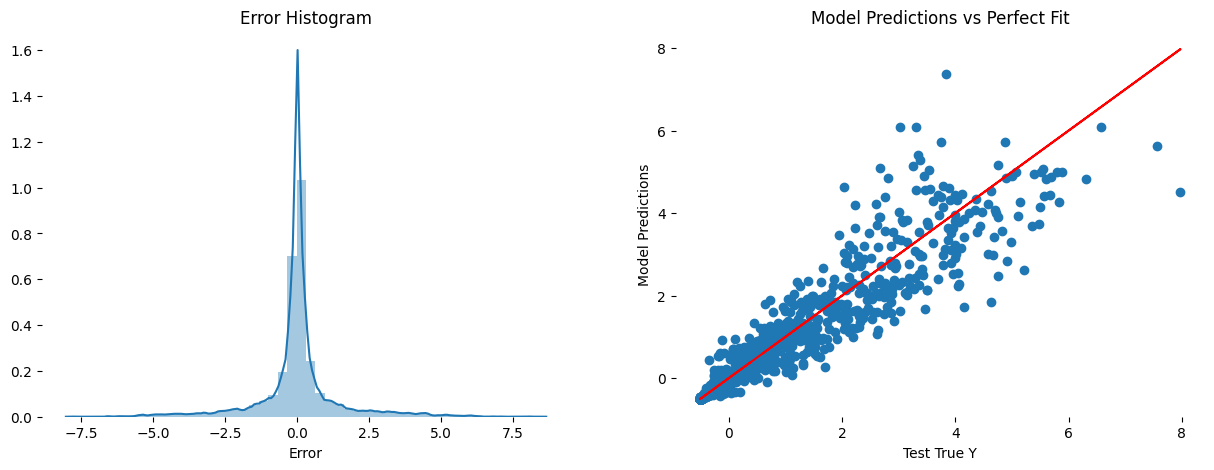

In [49]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

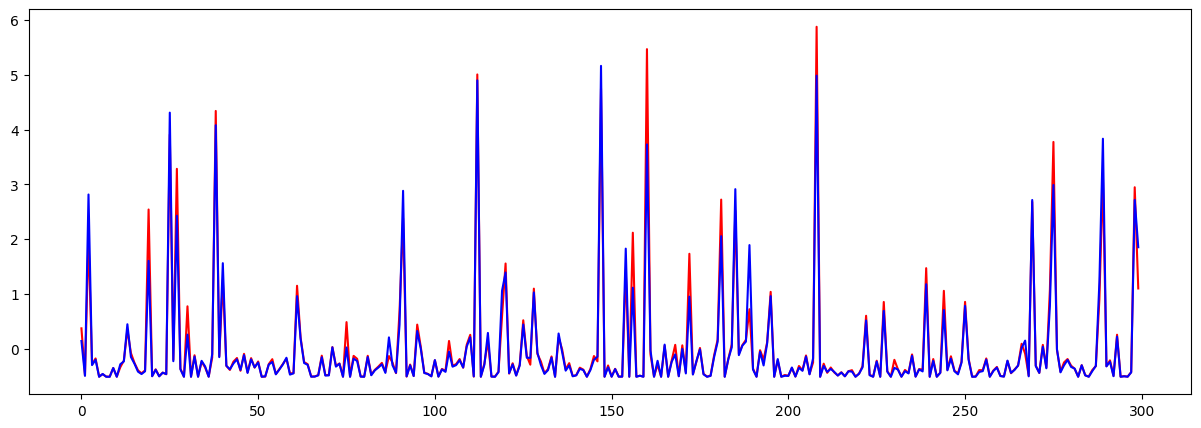

In [50]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')
plt.show()

In [51]:
#XGB Regressor
xboost = xgboost.XGBRegressor(random_state = 60)
predictions = fit_and_evaluate(xboost)

MAE:  0.10545990937121838
MSE:  0.09153005729113654
RMSE:  0.30253934833528107
Variance Regression Score:  0.9089963460562399
MAPE:  0.3159289247631124


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

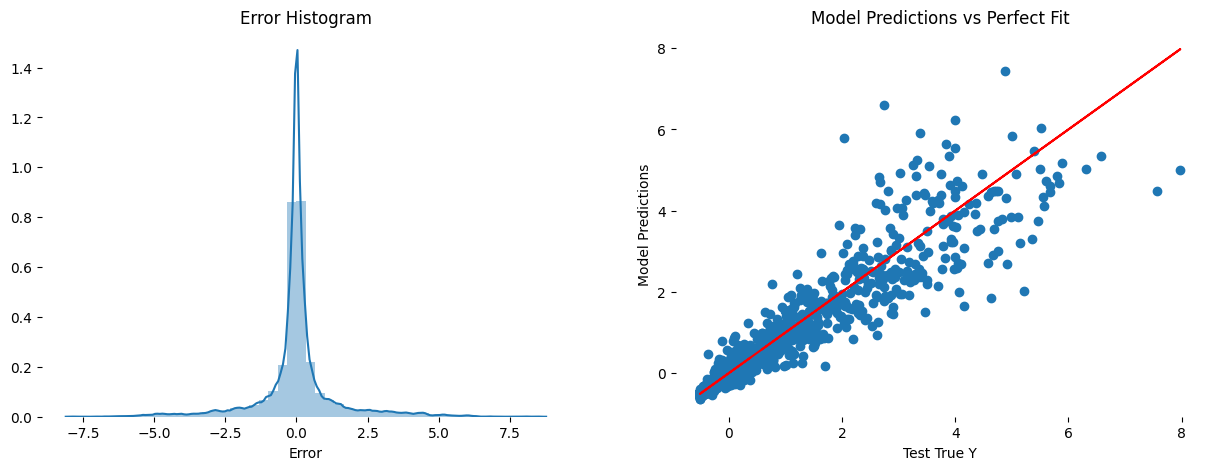

In [52]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

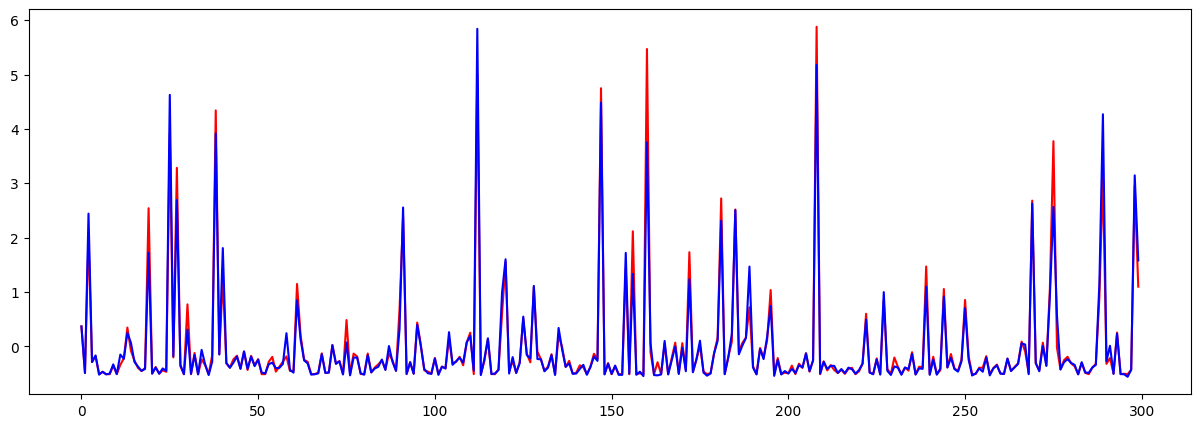

In [53]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')

In [54]:
# KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=10)
predictions = fit_and_evaluate(knn)

MAE:  0.1145235981841801
MSE:  0.08962050268577441
RMSE:  0.2993668363158725
Variance Regression Score:  0.9110593728502564
MAPE:  0.34106238567872166


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

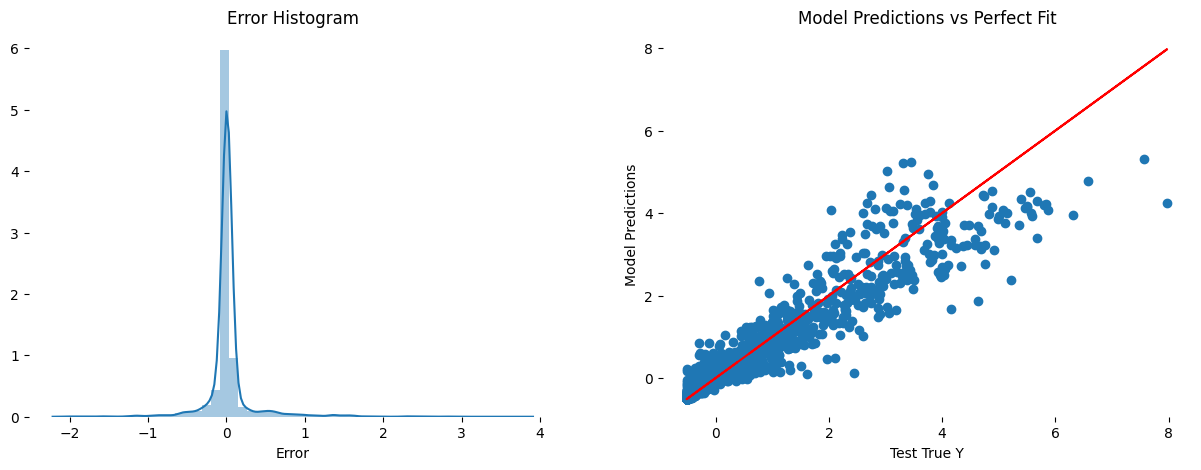

In [55]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.reshape(3756, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

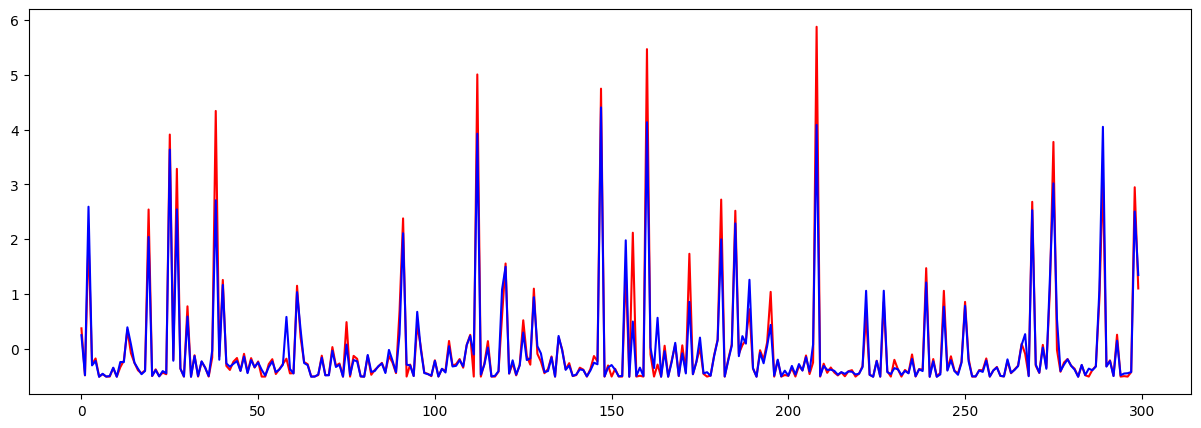

In [56]:
predictions.shape, y_test.shape
y_test = np.array(y_test).reshape(-1,1)
plt.figure(figsize=(15,5))
# sns.scatterplot(data=predictions,lw=1, color='red')
# sns.scatterplot(data=y_test,lw=1, color='blue')
# # # plt.xlabel('Epochs')
# # plt.ylabel('')
# # plt.title('Training Loss per Epoch')
# sns.despine()

plt.plot(y_test[:300,:], color = 'red')
plt.plot(predictions[:300], color = 'blue')

In [57]:
# # Comparision of all the models 

# model_comparison = pd.DataFrame({'model': [ 'Support Vector Machine',
#                                            'Random Forest', 'Gradient Boosted',
#                                             'K-Nearest Neighbors', 'Bagging','XBoost'],
#                                  'RMSE': [svr_RMSE, random_forest_RMSE, 
#                                          gradient_boosted_RMSE, knn_RMSE,bagging_RMSE,xboost_RMSE]})

# model_comparison.sort_values('RMSE', ascending = False).plot(x = 'model',
#                                                              y = 'RMSE', kind = 'barh', color = 'red',
#                                                              edgecolor = 'black', figsize = (10,4))
# plt.xlabel('Root Mean Squared Error')
# plt.title('Model Comparison on Test RMSE')
# plt.show()